<h2>EBA3400 Exercise Set 11: Visualization with Seaborn</h2>

<h3>11.1 Segmenting mall customers</h3>

A mall has gathered data on their customers through a loyalty program. They have information on e.g. age, gender, annual income and spending score. Spending Score is a measure from 0 to 100, created for each customer based on customer behavior and purchasing data.

Assume that you own the mall and want to understand the customers. What are young and old customers purchasing? How is the purchasing behaviour of wealthy compared to less wealthy customers?

- A Import pandas and seaborn and the customers.csv file. Set CustomerID as the index column. Rename your columns to: gender, age, income and spending score
- B Define all customers above 40 years as "Old" and all other customers as "Young" and add this information to a new column in your dataset named 'group'
- C Create a KDE plot of income and a countplot of group
- D Investigate the relationship between income and spending score. Try experimenting with coloring the observations by either gender, group or age. Should you use a Hex plot or a Scatter plot here?
- E Try running the K-Means Clustering algorithm shown in the code snippet below. This Machine Learning algorithm tries to automatically detect clusters of customers in the data. What do you see? (writing this code is outside the scope of this course).

<h4>Part A</h4>

In [1]:
import pandas as pd
import seaborn as sns 

In [2]:
customers = pd.read_csv('C:/Users/power/OneDrive/Documents/Programming/Data/customers.csv', index_col = 'CustomerID')
customers.columns = ['Gender', 'Age', 'Income', 'Score']
customers.head(5)

,Gender,Age,Income,Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


<h4>Part B</h4>

In [3]:
Group = []
for i in range(len(customers)):          #OR for i in customers['age']:
    if customers['Age'].iloc[i] >= 40:
        Group.append('Old')
    else:
        Group.append('Young')
customers['Group'] = Group
customers.head(5)

,Gender,Age,Income,Score,Group
CustomerID,,,,,
1,Male,19,15,39,Young
2,Male,21,15,81,Young
3,Female,20,16,6,Young
4,Female,23,16,77,Young
5,Female,31,17,40,Young


<h4>Part C</h4>

<AxesSubplot:xlabel='Income', ylabel='Density'>

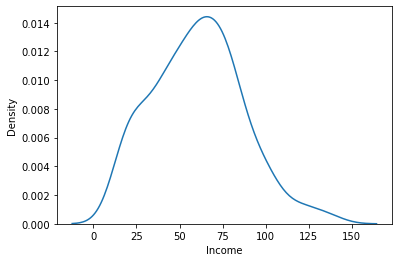

In [4]:
sns.kdeplot(customers['Income'])

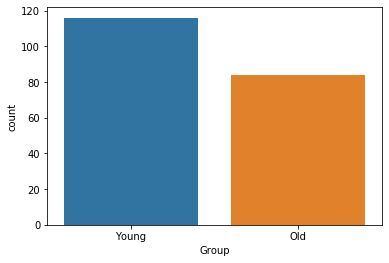

In [48]:
sns.countplot(customers['Group'])

<h4>Part D</h4>

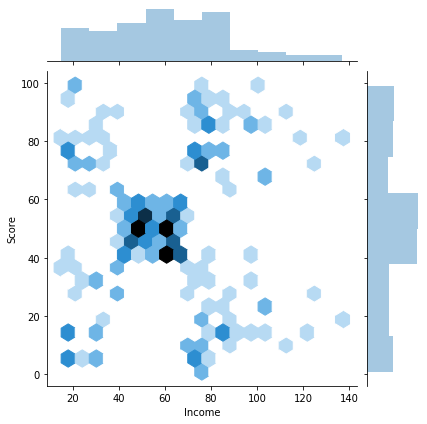

In [52]:
sns.jointplot(customers['Income'],customers['Score'],kind='hex',gridsize=20)

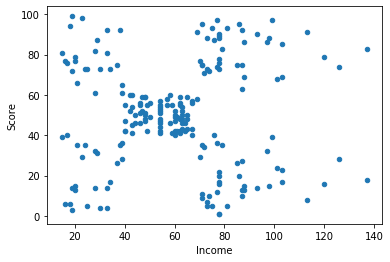

In [5]:
customers.plot.scatter(x='Income', y='Score')

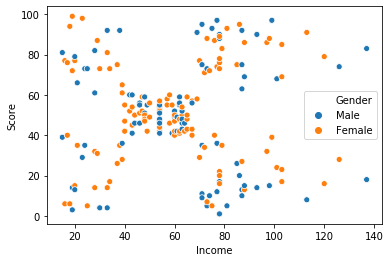

In [7]:
#OR
sns.scatterplot(y='Score', x='Income', hue='Gender', data=customers)

<h4>Part E</h4>

<AxesSubplot:xlabel='Income', ylabel='Score'>

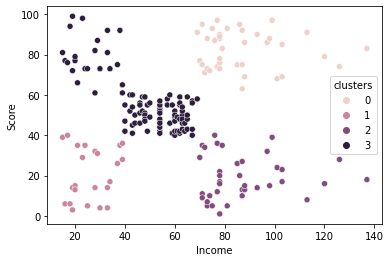

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scaling the data
X = customers[['Income','Score']]
sc = StandardScaler()
Xtr = sc.fit_transform(X)

# Fitting the K-Means Clustering Algorithm with 3 clusters
km = KMeans(n_clusters = 4, init = 'k-means++')
y = km.fit_predict(Xtr)

# Add cluster data to data frame
customers['clusters'] = y

# Plot results
sns.scatterplot(y='Score', x='Income',hue='clusters',data=customers)